# Data Cleaning

In [1]:
# Loading required libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
#import missingno as msno
plt.rcParams['figure.dpi'] = 140
import matplotlib.colors
%matplotlib inline
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

In [2]:
# Loading dataset downloaded from Kaggle
df = pd.read_csv("netflix_titles.csv")
regions = pd.read_csv("continents2.csv")
df.head(20)
df.shape

(8807, 12)

In [3]:
# Checking for NaN values
for i in df.columns:
    print('{} : {}'.format(i,df[i].isnull().values.sum()))

show_id : 0
type : 0
title : 0
director : 2634
cast : 825
country : 831
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0


In [4]:
# Checking no. of unique values
for i in df.columns:
    print('{} : {}'.format(i,len(df[i].unique())))

show_id : 8807
type : 2
title : 8807
director : 4529
cast : 7693
country : 749
date_added : 1768
release_year : 74
rating : 18
duration : 221
listed_in : 514
description : 8775


In [5]:
# Checking for data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
genre_list = []
all_genres = []
for genre in df['listed_in']:
    genre_list = genre_list + [genre.split(', ')]
    all_genres = all_genres + genre.split(', ')

In [7]:
for genre in set(all_genres):
    for i in np.arange(0,len(df)):
        if (genre in genre_list[i]):
            df.loc[i,genre] = 1
        else:
            df.loc[i,genre] = 0

In [8]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Stand-Up Comedy,Anime Features,LGBTQ Movies,Crime TV Shows,TV Shows,British TV Shows,Movies,TV Horror,Comedies,TV Mysteries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df['Country_Single'] = df['country'].apply(lambda x: str.split(str(x),sep=","))
df['Country_Single'] = df['Country_Single'].apply(lambda x: x[0])

In [10]:
region_map = regions[['name','region','sub-region']]
region_map. rename(columns = {'name':'country'}, inplace = True)
region_map['country'] = region_map['country'].apply(lambda x: str(x))
region_map.head(20)

,country,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
5,Andorra,Europe,Southern Europe
6,Angola,Africa,Sub-Saharan Africa
7,Anguilla,Americas,Latin America and the Caribbean
8,Antarctica,NaN,NaN
9,Antigua and Barbuda,Americas,Latin America and the Caribbean


In [11]:
df = pd.merge(df,region_map,how='left')
df.shape

(8807, 57)

In [12]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])
df['sub-region'] = df['sub-region'].fillna(df['sub-region'].mode()[0])
df['cast'].replace(np.nan,'No data', inplace = True)
df['director'].replace(np.nan,'No data', inplace = True)
# Checking for NaN values
for i in df.columns:
    print('{} : {}'.format(i,df[i].isnull().values.sum()))

show_id : 0
type : 0
title : 0
director : 0
cast : 0
country : 0
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0
Stand-Up Comedy & Talk Shows : 0
Music & Musicals : 0
Sci-Fi & Fantasy : 0
Reality TV : 0
Children & Family Movies : 0
TV Thrillers : 0
Teen TV Shows : 0
Thrillers : 0
TV Action & Adventure : 0
Cult Movies : 0
Korean TV Shows : 0
Classic Movies : 0
Documentaries : 0
Romantic Movies : 0
Action & Adventure : 0
Romantic TV Shows : 0
Sports Movies : 0
Kids' TV : 0
Science & Nature TV : 0
Faith & Spirituality : 0
Anime Series : 0
Classic & Cult TV : 0
TV Comedies : 0
Docuseries : 0
Dramas : 0
International Movies : 0
Horror Movies : 0
Spanish-Language TV Shows : 0
TV Dramas : 0
TV Sci-Fi & Fantasy : 0
Independent Movies : 0
International TV Shows : 0
Stand-Up Comedy : 0
Anime Features : 0
LGBTQ Movies : 0
Crime TV Shows : 0
TV Shows : 0
British TV Shows : 0
Movies : 0
TV Horror : 0
Comedies : 0
TV Mysteries : 0
Country_Single : 0
region : 0


In [13]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(8790, 57)

In [14]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Movies,TV Horror,Comedies,TV Mysteries,Country_Single,region,sub-region,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,United States,Americas,Northern America,9,September,2021
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,1.0,South Africa,Africa,Sub-Saharan Africa,9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,nan,Americas,Northern America,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,nan,Americas,Northern America,9,September,2021
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,India,Asia,Southern Asia,9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,...,0.0,1.0,0.0,1.0,nan,Americas,Northern America,9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,...,0.0,0.0,0.0,0.0,nan,Americas,Northern America,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,0.0,0.0,0.0,0.0,United States,Americas,Northern America,9,September,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,...,0.0,0.0,0.0,0.0,United Kingdom,Europe,Northern Europe,9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,0.0,0.0,1.0,0.0,United States,Americas,Northern America,9,September,2021


In [15]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
# Add age group based on ratings
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}
df['target_age'] = df['rating'].replace(ratings_ages)
df['target_age'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [17]:
df['Country_Single'].replace('United States', 'USA', inplace=True)
df['Country_Single'].replace('United Kingdom', 'UK',inplace=True)
df['Country_Single'].replace('South Korea', 'S. Korea',inplace=True)

In [18]:
df['count'] = 1
data_region = df[df['region'] != "nan"]
data_region = data_region.groupby('region')[['region','count']].sum().sort_values(by='count',ascending=False).reset_index()[0:15]
data_region = data_region['region']
data_region

0    Americas
1        Asia
2      Europe
3      Africa
4     Oceania
Name: region, dtype: object

In [19]:
df['count'] = 1
data = df[df['Country_Single'] != "nan"]
data = data.groupby('Country_Single')[['Country_Single','count']].sum().sort_values(by='count',ascending=False).reset_index()[0:15]
data = data['Country_Single']
data

0           USA
1         India
2            UK
3        Canada
4         Japan
5        France
6      S. Korea
7         Spain
8        Mexico
9     Australia
10        Egypt
11       Turkey
12      Germany
13        China
14      Nigeria
Name: Country_Single, dtype: object

In [20]:
df_shows = df[df['type'] == "TV Show"]
df_shows['seasons'] = df_shows['duration'].apply(lambda x: re.findall(r'\b\d+\b',str(x)))
df_shows['seasons'] = pd.to_numeric(df_shows['seasons'].apply(lambda x: x[0]))
df_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Mysteries,Country_Single,region,sub-region,month_added,month_name_added,year_added,target_age,count,seasons
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,1.0,South Africa,Africa,Sub-Saharan Africa,9,September,2021,Adults,1,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,...,0.0,nan,Americas,Northern America,9,September,2021,Adults,1,1
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,...,0.0,nan,Americas,Northern America,9,September,2021,Adults,1,1
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,0.0,India,Asia,Southern Asia,9,September,2021,Adults,1,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,...,1.0,nan,Americas,Northern America,9,September,2021,Adults,1,1


# **Hypothesis : More content is added during the Holiday period in North America and Europe**

**How has content been added over the years for both movies and tv shows?**

**Inference:** We see a slow start for Netflix over several years. Things begin to pick up in 2015 with a rapid increase from 2016 for both movies and TV Shows. Although we see a much rapid increase for movies than shows. It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic. 



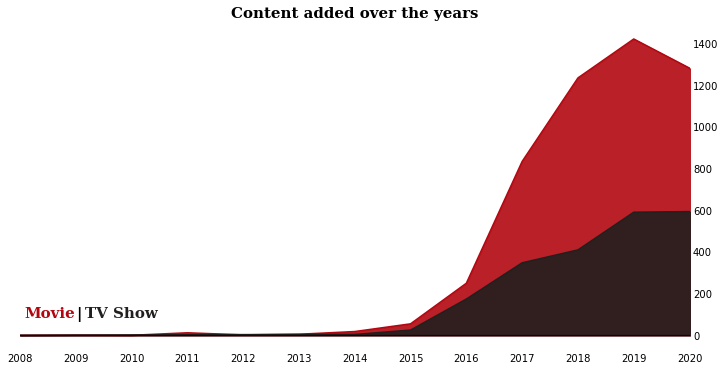

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]
for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)  
ax.yaxis.tick_right()   
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))
#fig.text(0.13, 0.85, 'Movies & TV Shows added over the years', fontsize=15, fontweight='bold', fontfamily='serif')
#fig.text(0.13, 0.59, ' ', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Content added over the years',  fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

**How is content added month over month?** 

**Inference:** We see that the months of December and July have the highest number of content added which also coincides with the winter and summer vacation period where people will be directed towards watching online content. This will be helpful for our users like Netflix and Content producers to know so they can add more relevant content during this period based on their target audience

In [22]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

In [23]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].T
data_sub2 = data_sub
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()
data_sub2
#data_table = data_sub2.sort_values(by='Value',ascending=False)
data_table = data_sub2.rename(columns = {'type': 'Month_ID', 'index':'Month', 'TV Show': '# TV Show','Movie': '# Movie','Value':'# Total Content'})

In [24]:
data_sub

type,TV Show,Movie,Value
January,192,545,737
February,180,382,562
March,213,528,741
April,214,549,763
May,193,439,632
June,236,492,728
July,262,565,827
August,236,518,754
September,251,518,769
October,215,545,760


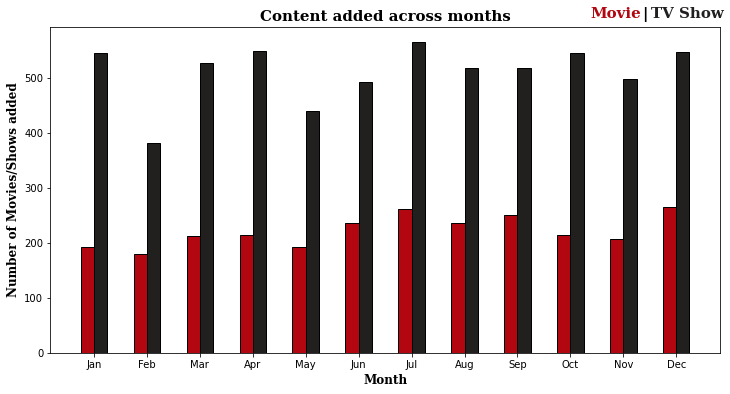

<Figure size 720x14400 with 0 Axes>

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n=12
r = np.arange(n)
width = 0.25
plt.bar(r, data_table['# TV Show'], color = '#b20710',
        width = width, edgecolor = 'black',
        label='TV Shows')
plt.bar(r + width, data_table['# Movie'], color = '#221f1f',
        width = width, edgecolor = 'black',
        label='Movies')  
plt.xlabel("Month", fontweight="bold", fontfamily='serif', fontsize=12)
plt.ylabel("Number of Movies/Shows added", fontweight="bold", fontfamily='serif', fontsize=12)
plt.title("Content added across months", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.figure(figsize=(10, 200))
plt.show()

**How is content added month over month based on countries?**

**Inference:** We observe that the Americas region have the highest number of content added over the months with the highest during the months of December, July and September. We can see a content slump in the month of February for Americas. Similarly for the Asia region we see a uptick in the months of December, April and March. While for the regions Europe, Oceania and Africa we do not necessarily see a pattern  for specific months with almost equal number of content added over the months. We can say that based on our hypothesis we do see a strong evidence for the Americas region but not for the Europe region. December and July are the vacation period hence our consumers would watch more content online hence our users can develop more content that can be streamed during those months.

In [26]:
data_sub

type,TV Show,Movie,Value
January,192,545,737
February,180,382,562
March,213,528,741
April,214,549,763
May,193,439,632
June,236,492,728
July,262,565,827
August,236,518,754
September,251,518,769
October,215,545,760


In [27]:
df['region'].value_counts()

Americas    5441
Asia        2068
Europe       941
Africa       243
Oceania       97
Name: region, dtype: int64

In [28]:
df.groupby('region')['month_name_added'].value_counts()

region             
Africa    June          51
          April         31
          May           26
          December      21
          March         20
          July          19
          September     19
          February      17
          August        12
          November      12
          October        9
          January        6
Americas  July         534
          January      521
          September    488
          August       481
          December     460
          November     458
          October      457
          June         453
          April        443
          March        408
          May          406
          February     332
Asia      December     232
          April        210
          October      199
          March        196
          August       184
          July         171
          September    171
          November     170
          January      140
          June         134
          May          133
          February     128
Europe  

In [29]:
data_sub_c = df.groupby(['region'])['month_name_added'].value_counts().unstack().fillna(0).T
data_sub_c

region,Africa,Americas,Asia,Europe,Oceania
January,6,521,140,67,3
February,17,332,128,81,4
March,20,408,196,112,5
April,31,443,210,75,4
May,26,406,133,61,6
June,51,453,134,81,9
July,19,534,171,84,19
August,12,481,184,70,7
September,19,488,171,84,7
October,9,457,199,83,12


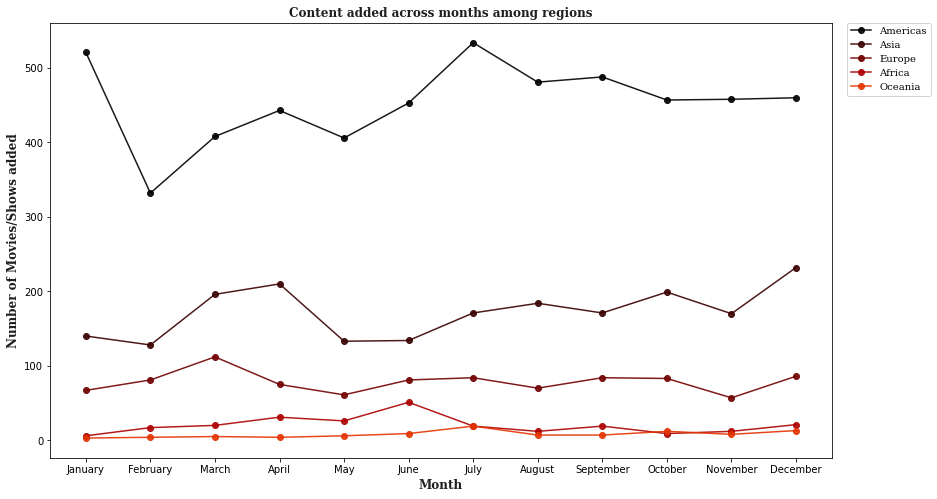

In [30]:

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
#color = sns.color_palette("pastel", 100).as_hex()
#color  = sns.color_palette("pastel15", 100).as_hex()
import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colors = plt.cm.gist_heat(np.linspace(0,0.6,5))
#color =  new.paste(newt, (i*width_px//iter,15))
for i, mtv in enumerate(df['region'].value_counts().index):
    mtv_rel = data_sub_c[mtv]
    plt.plot(mtv_rel.index, mtv_rel, 'o-', color=colors[i], label=mtv,alpha=0.9)    
L = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.setp(L.texts, family='serif')
plt.xlabel('Month',  fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
plt.ylabel('Number of Movies/Shows added',  fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
plt.title('Content added across months among regions', fontsize=12, fontweight='bold', fontfamily='serif', color = '#221f1f')
plt.show()